# Swissroll Example

### Imports

In [27]:
from sklearn import datasets, neighbors, preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

# local imports
from os import chdir
chdir("../")

from lllvm import LL_LVM

chdir("demo")

# Plotting configuration
%matplotlib inline
sns.set()

# Simulation Data

In [29]:
x, t_true = datasets.make_swiss_roll(300, 0.01)
x = x / np.sum(x,0)
x = x.T
Dy, N = x.shape
Dt = 1

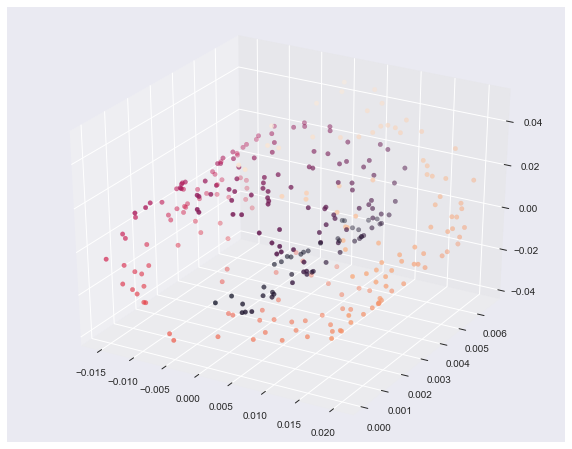

In [30]:
rcParams['figure.figsize'] = (10,8)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0,:], x[1,:], x[2,:], c=t_true, marker='o')
plt.show()

# Model

In [31]:
tinit = np.random.uniform(-1.5, 1.5, size=(Dt, N))
Cinit = 0.5*np.random.randn(Dy,Dt*N)

#build nearest neighbor graph
G = neighbors.kneighbors_graph(x.T, 9, mode='connectivity')
G = G + G.T
G.data = np.ones_like(G.data)

#set user-defined parameters
alpha = 1.0
gamma = 5.0
epsilon = .00001
V = np.identity(Dy) / gamma

model = LL_LVM(G,epsilon,alpha,V,Cinit,tinit,x,.01)

# Sampling

In [32]:
n_burn = 100

for i in range(n_burn):
    print("\rStep %d of %d" % (i+1,n_burn), end="")
    model.MH_step(burn_in=True)

Step 100 of 100

In [33]:
n_samp = 300

for i in range(n_samp):
    print("\rStep %d of %d" % (i+1,n_samp), end="")
    model.MH_step(burn_in=False)

Step 300 of 300

In [34]:
print("Acceptance rate: %.8f" % model.accept_rate)

Acceptance rate: 0.43666667


# Likelihood Plot

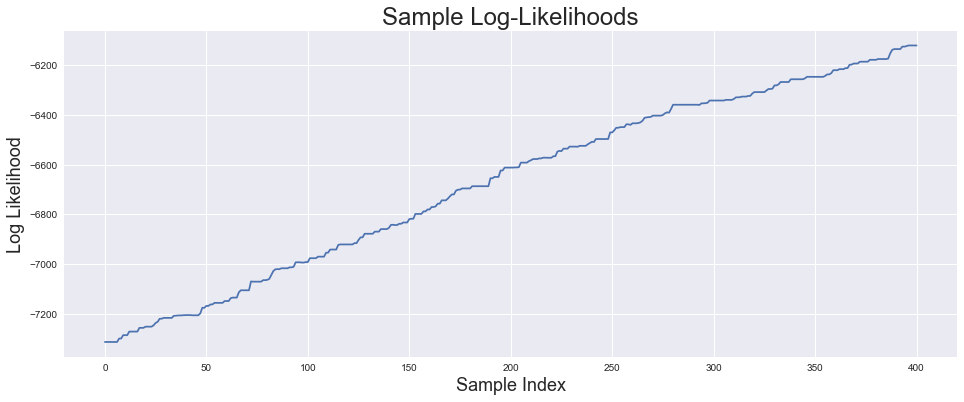

In [35]:
rcParams['figure.figsize'] = (16,6)
plt.plot(model.likelihoods)
plt.title("Sample Log-Likelihoods", fontsize=24)
plt.ylabel("Log Likelihood", fontsize=18)
plt.xlabel("Sample Index", fontsize=18);

## Version Information

In [9]:
%load_ext version_information
%version_information numpy, scipy, sklearn, matplotlib, version_information

Software versions
Python 3.6.2 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 6.2.1
OS Darwin 15.6.0 x86_64 i386 64bit
numpy 1.13.3
scipy 0.19.1
sklearn 0.19.1
matplotlib 2.1.0
version_information 1.0.3
Sat Nov 11 15:52:09 2017 EST